# パワー持ちのフリートレードの変動について調査
/data/FreeTradeHistory.csvはフリトレの履歴が記録されたcsvファイルです。  
[デレマスボーダーポータル](https://pink-check.school/file)でダウンロードしてください。

In [1]:
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

In [2]:
# フリトレ履歴
csv_path = "./data/FreeTradeHistory.csv"

In [3]:
df = pd.read_csv(csv_path)

In [4]:
df.head(2)

,Mobageフリートレード明細ID,トレード対象カードハッシュ,トレード対象カード名,トレード日時,プレミアムサインあり,送り元プロデューサー名,宛先プロデューサー名,交換アイテム1 アイテム種別,交換アイテム1 取引量,交換アイテム1 カードハッシュ,...,交換アイテム3 カードハッシュ,交換アイテム3 カード名,交換アイテム4 アイテム種別,交換アイテム4 取引量,交換アイテム4 カードハッシュ,交換アイテム4 カード名,交換アイテム5 アイテム種別,交換アイテム5 取引量,交換アイテム5 カードハッシュ,交換アイテム5 カード名
0,19240907,91f73d36b69535cd4578ec74637c6059,[ﾌｧｲｱｵﾊﾟｰﾙ76ct]如月千早+,2013/09/20 18:20:31,なし,john-s117,Ntak,エナジードリンク,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19550971,91f73d36b69535cd4578ec74637c6059,[ﾌｧｲｱｵﾊﾟｰﾙ76ct]如月千早+,2013/09/29 11:21:13,なし,ゆい,MBTC,エナジードリンク,9.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print("columns list")
for col in df.columns:
    print(col)

columns list
Mobageフリートレード明細ID
トレード対象カードハッシュ
トレード対象カード名
トレード日時
プレミアムサインあり
送り元プロデューサー名
宛先プロデューサー名
交換アイテム1 アイテム種別
交換アイテム1 取引量
交換アイテム1 カードハッシュ
交換アイテム1 カード名
交換アイテム2 アイテム種別
交換アイテム2 取引量
交換アイテム2 カードハッシュ
交換アイテム2 カード名
交換アイテム3 アイテム種別
交換アイテム3 取引量
交換アイテム3 カードハッシュ
交換アイテム3 カード名
交換アイテム4 アイテム種別
交換アイテム4 取引量
交換アイテム4 カードハッシュ
交換アイテム4 カード名
交換アイテム5 アイテム種別
交換アイテム5 取引量
交換アイテム5 カードハッシュ
交換アイテム5 カード名


In [6]:
# date および indexを日時情報に変換
df["date"]=pd.to_datetime(df["トレード日時"])
df.index = df["date"]

In [7]:
# パワー持ち一覧
power_list = [
    "[輝く夏飛沫]ｱﾅｽﾀｼｱ+",
    "[夏色の南風]新田美波+",
    "[めろめろｻﾏｰ]諸星きらり+",
    "[ﾊﾟﾜﾌﾙﾁｱｰ]仙崎恵磨+",
    "[水着商法]夢見りあむ+",
    "[楽園の佳景]藤原肇+",
    "[夏めく精神]中野有香+",
    "[向日葵色の音楽会]水本ゆかり+",
    "[笑顔のｴﾀｰﾅﾙｻﾏｰ]島村卯月+",
    "[きらきらのせかい]市原仁奈+",
    "[ｼﾝﾃﾞﾚﾗｶﾞｰﾙ]北条加蓮+",
    "[ｱﾒﾘｶﾝｶｼﾞｭｱﾙ]土屋亜子+",
    "[ｾﾝﾘﾂﾉﾖﾙ]白坂小梅+",
    "[ｽｲｰﾄｻﾏｰ]椎名法子+",
    "[眼鏡ﾏｼﾞｯｸ]上条春菜+",
    
]

# イベント期間は7/31～8/8なので、±1した期間のデータを分析する
start_date =  dt.datetime(2020,7,30)
end_date =  dt.datetime(2020,8,9)

In [8]:
# イベント期間にスタドリのみで取引しているもののみを抽出
def get_target_idol(df,name,start,end):
    df_tmp = df[df["トレード対象カード名"]==name]
    df_tmp = df_tmp[df_tmp["date"]>=start]
    df_tmp = df_tmp[df_tmp["date"]<=end]
    df_tmp=df_tmp[df_tmp["交換アイテム1 アイテム種別"]=="スタミナドリンク"]
    df_tmp=df_tmp[df_tmp["交換アイテム2 アイテム種別"].isnull()==True]
    return df_tmp

In [9]:
df_info = pd.DataFrame()

for name in power_list:
    df_tmp = get_target_idol(df,name,start_date,end_date)
    
    if len(df_tmp)>0:
       
    
        df_info = df_info.append(pd.DataFrame(
        {
            "name":[name],"count":[len(df_tmp)],
            "start_value":[ df_tmp["交換アイテム1 取引量"].iloc[0]],
            "end_value":[ df_tmp["交換アイテム1 取引量"].iloc[-1]],
            "start_end_diff":[ df_tmp["交換アイテム1 取引量"].iloc[-1]- df_tmp["交換アイテム1 取引量"].iloc[0]],            
            "min_value":[ df_tmp["交換アイテム1 取引量"].min()],
            "max_value":[ df_tmp["交換アイテム1 取引量"].max()],
        }))
    else:
        df_info = df_info.append(pd.DataFrame(
        {
            "name":[name],"count":[len(df_tmp)],
            "start_value":[-1],
            "end_value":[ -1],
            "start_end_diff":[-1],            
            "min_value":[-1],
            "max_value":[-1],
        }))
        
print("パワー持ちごとのデータ件数,スタドリ価格")
df_info = df_info.reset_index(drop=True)
df_info

パワー持ちごとのデータ件数,スタドリ価格


,name,count,start_value,end_value,start_end_diff,min_value,max_value
0,[輝く夏飛沫]ｱﾅｽﾀｼｱ+,240,790.0,820.0,30.0,1.0,970.0
1,[夏色の南風]新田美波+,409,205.0,229.0,24.0,1.0,318.0
2,[めろめろｻﾏｰ]諸星きらり+,486,90.0,75.0,-15.0,1.0,160.0
3,[ﾊﾟﾜﾌﾙﾁｱｰ]仙崎恵磨+,87,1.0,1.0,0.0,1.0,5.0
4,[水着商法]夢見りあむ+,305,50.0,50.0,0.0,1.0,140.0
5,[楽園の佳景]藤原肇+,190,285.0,180.0,-105.0,1.0,320.0
6,[夏めく精神]中野有香+,255,82.0,49.0,-33.0,30.0,95.0
7,[向日葵色の音楽会]水本ゆかり+,291,380.0,190.0,-190.0,185.0,500.0
8,[笑顔のｴﾀｰﾅﾙｻﾏｰ]島村卯月+,246,880.0,800.0,-80.0,790.0,900.0
9,[きらきらのせかい]市原仁奈+,327,415.0,250.0,-165.0,1.0,470.0


In [10]:
print("開始時とそれほどスタドリが減っていないパワー持ち")
df_info[df_info["start_end_diff"]>-10]

開始時とそれほどスタドリが減っていないパワー持ち


,name,count,start_value,end_value,start_end_diff,min_value,max_value
0,[輝く夏飛沫]ｱﾅｽﾀｼｱ+,240,790.0,820.0,30.0,1.0,970.0
1,[夏色の南風]新田美波+,409,205.0,229.0,24.0,1.0,318.0
3,[ﾊﾟﾜﾌﾙﾁｱｰ]仙崎恵磨+,87,1.0,1.0,0.0,1.0,5.0
4,[水着商法]夢見りあむ+,305,50.0,50.0,0.0,1.0,140.0
13,[ｽｲｰﾄｻﾏｰ]椎名法子+,10,5.0,1.0,-4.0,1.0,5.0
14,[眼鏡ﾏｼﾞｯｸ]上条春菜+,0,-1.0,-1.0,-1.0,-1.0,-1.0


In [11]:
print("150以上減ったパワー持ち")
df_info[df_info["start_end_diff"]<=-150]

150以上減ったパワー持ち


,name,count,start_value,end_value,start_end_diff,min_value,max_value
7,[向日葵色の音楽会]水本ゆかり+,291,380.0,190.0,-190.0,185.0,500.0
9,[きらきらのせかい]市原仁奈+,327,415.0,250.0,-165.0,1.0,470.0
10,[ｼﾝﾃﾞﾚﾗｶﾞｰﾙ]北条加蓮+,110,950.0,645.0,-305.0,1.0,960.0
11,[ｱﾒﾘｶﾝｶｼﾞｭｱﾙ]土屋亜子+,177,465.0,280.0,-185.0,1.0,520.0
12,[ｾﾝﾘﾂﾉﾖﾙ]白坂小梅+,37,1050.0,550.0,-500.0,500.0,1300.0


In [12]:
matplotlib.matplotlib_fname()

'C:\\Users\\mopper\\.matplotlib\\matplotlibrc'

In [13]:
matplotlib.rcParams['font.family']

['IPAexGothic']

In [14]:
matplotlib.get_configdir()

'C:\\Users\\mopper\\.matplotlib'

In [15]:
matplotlib.get_cachedir()

'C:\\Users\\mopper\\.matplotlib'

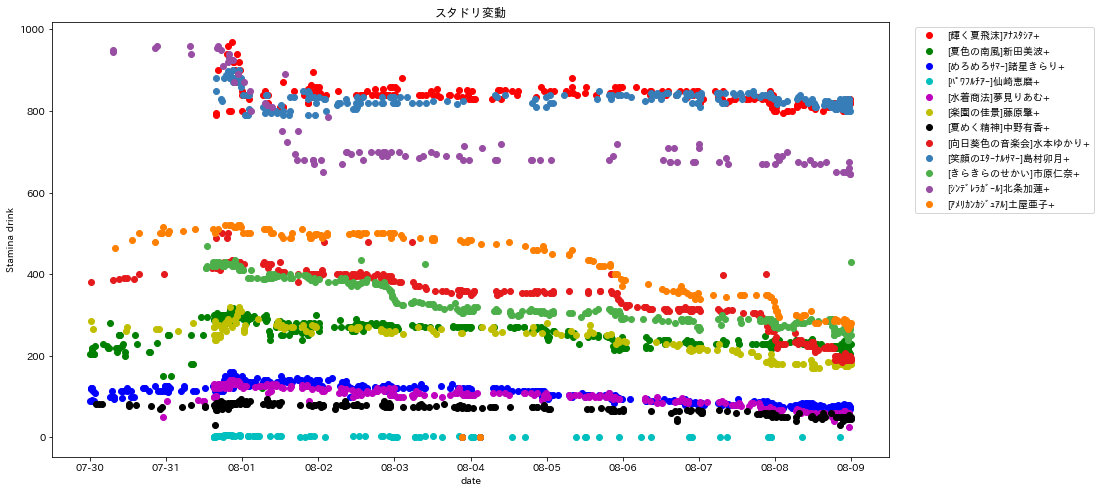

In [28]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,1,1)

colorlist = ["r", "g", "b", "c", "m", "y", "k",'#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33']
color_no = 0

for i in range(len(power_list)):
    name = power_list[i]
    df_tmp = get_target_idol(df,name,start_date,end_date)
    
    # 取引回数が少ないのは除外
    if len(df_tmp)<50:
        continue
    color = colorlist[color_no]
    color_no=color_no+1
    ax1.plot_date(df_tmp["date"],df_tmp["交換アイテム1 取引量"],color=color,label=name)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax1.set_ylabel("Stamina drink")
ax1.set_xlabel("date")
plt.legend(loc="upper right",bbox_to_anchor=(1.25,1))
plt.subplots_adjust(wspace=1.2)
plt.title("スタドリ変動")
plt.show()

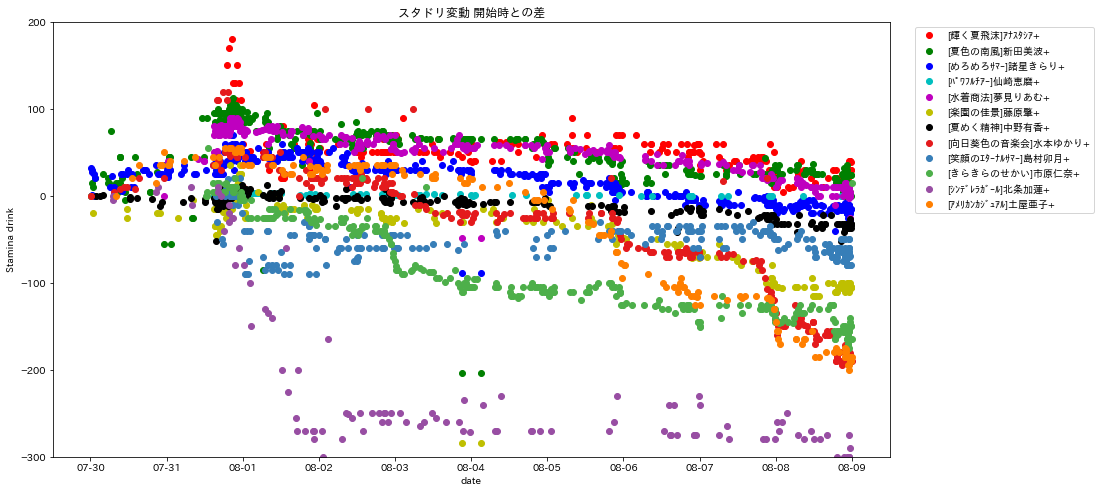

In [30]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,1,1)

colorlist = ["r", "g", "b", "c", "m", "y", "k",'#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33']
color_no = 0

for i in range(len(power_list)):
    name = power_list[i]
    df_tmp = get_target_idol(df,name,start_date,end_date)
    
    # 取引回数が少ないのは除外
    if len(df_tmp)<50:
        continue
    color = colorlist[color_no]
    color_no=color_no+1
    ax1.plot_date(df_tmp["date"],df_tmp["交換アイテム1 取引量"]-df_tmp["交換アイテム1 取引量"].iloc[0],color=color,label=name)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax1.set_ylabel("Stamina drink")
ax1.set_xlabel("date")
ax1.set_ylim(-300,200)
plt.legend(loc="upper right",bbox_to_anchor=(1.25,1))
plt.subplots_adjust(wspace=1.2)
plt.title("スタドリ変動 開始時との差")
plt.show()


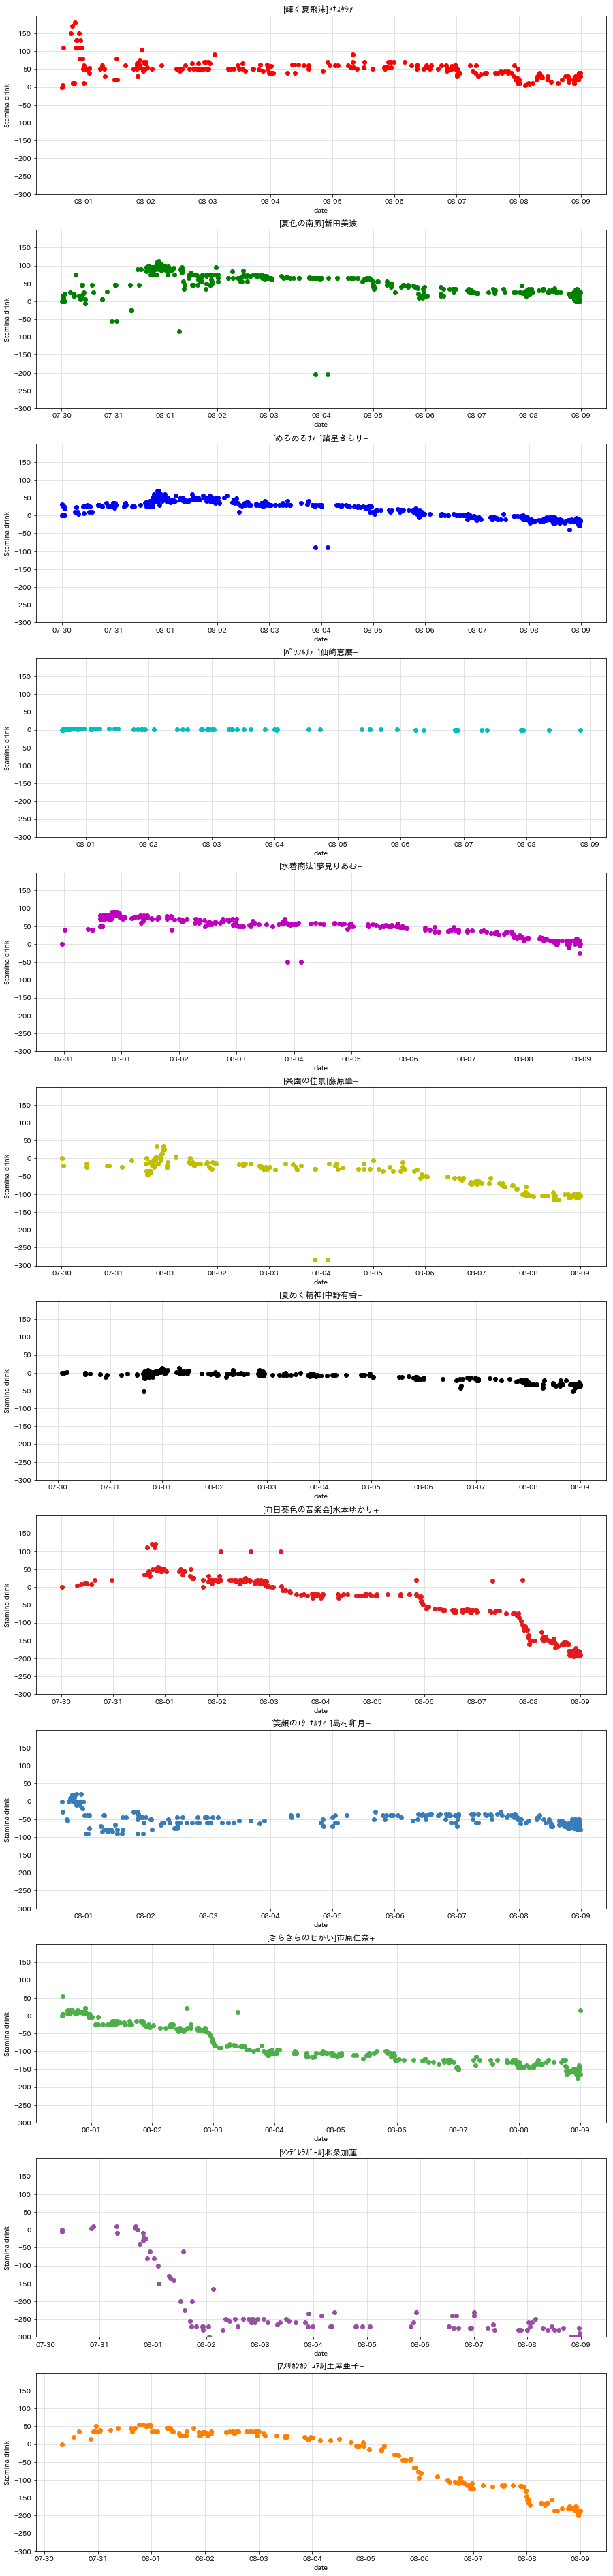

In [38]:
fig = plt.figure(figsize=(15,80))

colorlist = ["r", "g", "b", "c", "m", "y", "k",'#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33']
color_no = 0

for i in range(len(power_list)):
    name = power_list[i]
    df_tmp = get_target_idol(df,name,start_date,end_date)
    
    # 取引回数が少ないのは除外
    if len(df_tmp)<50:
        continue
    color = colorlist[color_no]
    color_no=color_no+1
    ax1 = fig.add_subplot(14,1,color_no,yticks=list(range(-300,200,50)))
    ax1.plot_date(df_tmp["date"],df_tmp["交換アイテム1 取引量"]-df_tmp["交換アイテム1 取引量"].iloc[0],color=color,label=name)
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    ax1.set_ylabel("Stamina drink")
    ax1.set_xlabel("date")
    ax1.set_ylim(-300,200)
    ax1.set_title(name)
    ax1.grid(c='gainsboro', zorder=9)

plt.show()


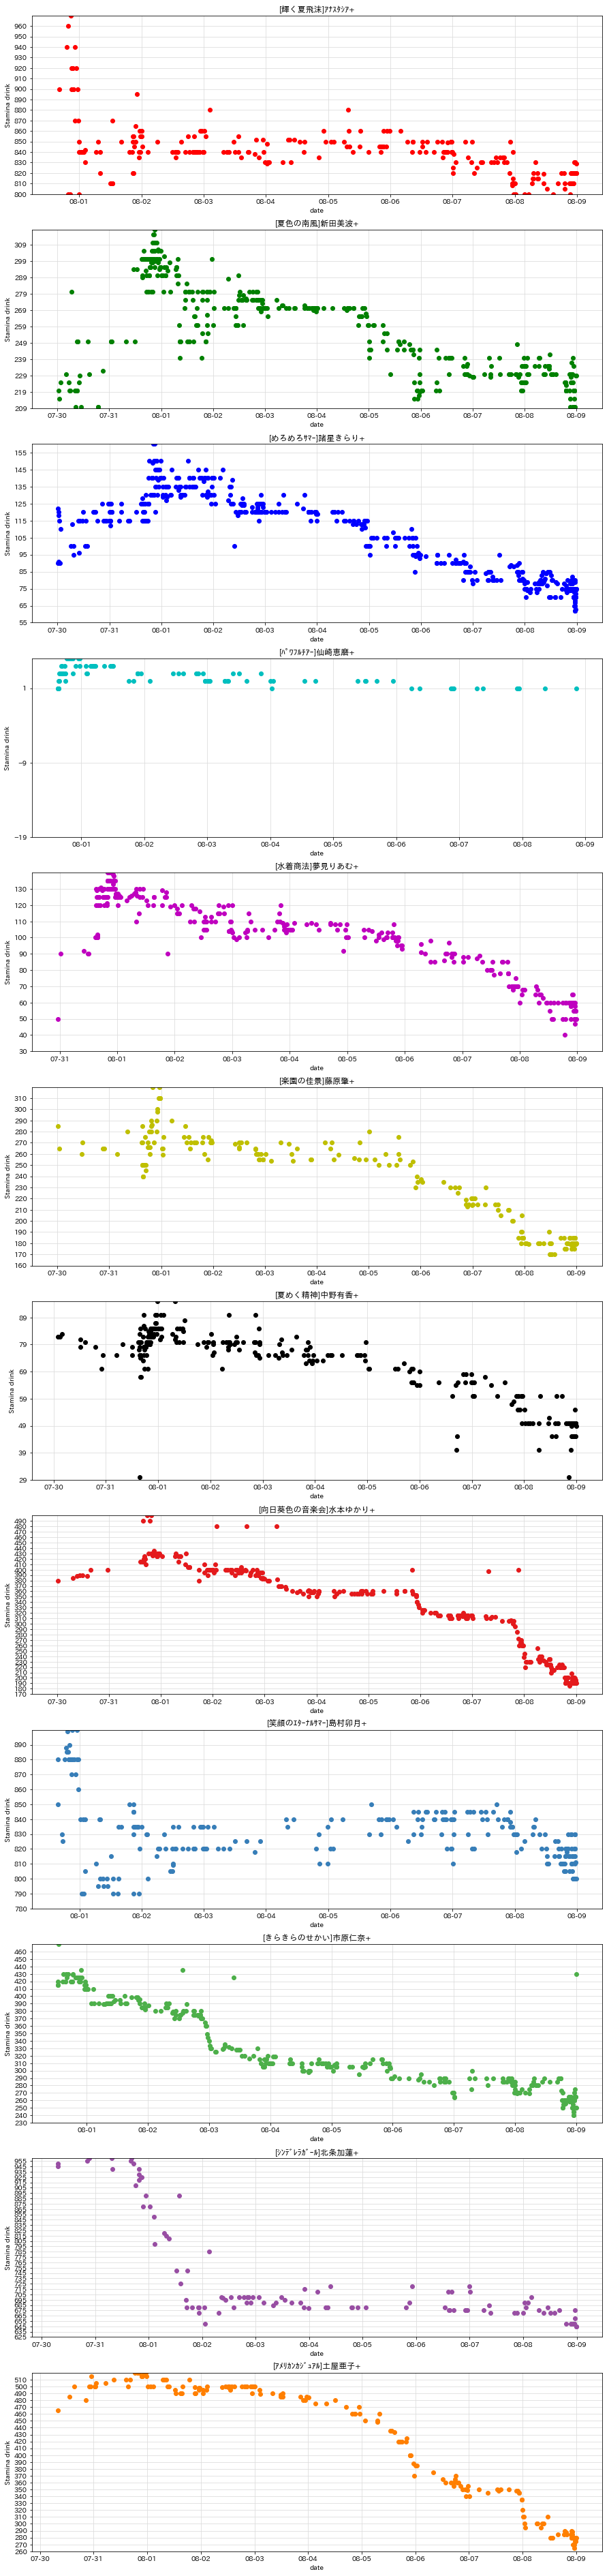

In [53]:
fig = plt.figure(figsize=(15,80))

colorlist = ["r", "g", "b", "c", "m", "y", "k",'#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33']
color_no = 0

for i in range(len(power_list)):
    name = power_list[i]
    df_tmp = get_target_idol(df,name,start_date,end_date)
    
    # 取引回数が少ないのは除外
    if len(df_tmp)<50:
        continue
    color = colorlist[color_no]
    color_no=color_no+1
    ax1 = fig.add_subplot(14,1,color_no,yticks=list(range(int(df_tmp["交換アイテム1 取引量"].iloc[-1]-20),int(df_tmp["交換アイテム1 取引量"].max()),10)))
    ax1.plot_date(df_tmp["date"],df_tmp["交換アイテム1 取引量"],color=color,label=name)
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    ax1.set_ylabel("Stamina drink")
    ax1.set_xlabel("date")
    ax1.set_title(name)
    ax1.set_ylim(int(df_tmp["交換アイテム1 取引量"].iloc[-1]-20),int(df_tmp["交換アイテム1 取引量"].max()))
    ax1.grid(c='gainsboro', zorder=9)

plt.show()
